# Data cleaning and wrangling for the categorical data

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

# getting the data

In [6]:
data = pd.read_csv('unit4.csv')
data.head()

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,,3712,XXXX,,F,T2,NaN,,479,635,3,2,307,318,349,378,12883,,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,,5202,XXXX,,M,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,,0,XXXX,,M,R2,3.0,U,497,546,2,1,251,292,292,340,11576,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,U,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,,2001,XXXX,X,F,S2,3.0,H,576,594,4,3,240,250,293,321,9836,,113,43,10,25,9702,L2F,37,14.0,6.864865


In [11]:
data.shape

(90569, 28)

# data explore

In [8]:
#Standardize header names
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower().replace(' ','_'))
data.columns = cols
print(data.columns)

Index(['state', 'pvastate', 'dob', 'mdmaud', 'recp3', 'gender', 'domain',
       'income', 'homeownr', 'hv1', 'hv2', 'hv3', 'hv4', 'ic1', 'ic2', 'ic3',
       'ic4', 'ic5', 'veterans', 'numprom', 'cardprom', 'cardpm12', 'numprm12',
       'maxadate', 'rfa_2', 'ngiftall', 'timelag', 'avggift'],
      dtype='object')


In [9]:
#looking for the head column 
data.head()

,state,pvastate,dob,mdmaud,recp3,gender,domain,income,homeownr,hv1,hv2,hv3,hv4,ic1,ic2,ic3,ic4,ic5,veterans,numprom,cardprom,cardpm12,numprm12,maxadate,rfa_2,ngiftall,timelag,avggift
0,IL,,3712,XXXX,,F,T2,NaN,,479,635,3,2,307,318,349,378,12883,,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,,5202,XXXX,,M,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,,0,XXXX,,M,R2,3.0,U,497,546,2,1,251,292,292,340,11576,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,U,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,,2001,XXXX,X,F,S2,3.0,H,576,594,4,3,240,250,293,321,9836,,113,43,10,25,9702,L2F,37,14.0,6.864865


In [40]:
data.describe()

,dob,income,hv1,hv2,hv3,hv4,ic1,ic2,ic3,ic4,ic5,numprom,cardprom,cardpm12,numprm12,maxadate,ngiftall,timelag,avggift
count,90569.000000,70386.000000,90569.000000,90569.00000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,80916.000000,90569.000000
mean,2724.442789,3.878257,1056.391304,1127.42116,4.213473,3.865462,339.373240,386.231083,386.694068,429.977917,15682.038600,46.797204,18.370701,5.343407,12.837351,9701.640606,9.501353,8.114378,13.428585
std,2136.453823,1.855265,936.383991,942.16266,2.302380,2.239738,162.390371,173.082626,160.945113,171.332133,8508.870754,22.944967,8.582096,1.207126,4.499933,5.679884,8.495065,8.310877,10.796349
min,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,9611.000000,1.000000,0.000000,1.285714
25%,112.000000,2.000000,511.000000,553.00000,3.000000,2.000000,230.000000,273.000000,277.000000,314.000000,10770.000000,27.000000,11.000000,5.000000,11.000000,9702.000000,3.000000,4.000000,8.454545
50%,2610.000000,4.000000,735.000000,800.00000,4.000000,3.000000,309.000000,355.000000,353.000000,396.000000,13692.000000,46.000000,18.000000,6.000000,12.000000,9702.000000,7.000000,6.000000,11.666667
75%,4601.000000,5.000000,1206.000000,1320.00000,5.000000,5.000000,414.000000,464.000000,465.000000,513.000000,18128.000000,64.000000,25.000000,6.000000,13.000000,9702.000000,13.000000,11.000000,15.625000
max,9710.000000,7.000000,6000.000000,6000.00000,13.000000,13.000000,1500.000000,1500.000000,1500.000000,1500.000000,159306.000000,195.000000,61.000000,19.000000,78.000000,9702.000000,237.000000,1088.000000,1000.000000


Remove the outliers in the dataset using one of the methods we've discussed by defining a function and applying it to the dataframe.

In [41]:
#identify outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

dob         4489.000000
income         3.000000
hv1          695.000000
hv2          767.000000
hv3            2.000000
hv4            3.000000
ic1          184.000000
ic2          191.000000
ic3          188.000000
ic4          199.000000
ic5         7358.000000
numprom       37.000000
cardprom      14.000000
cardpm12       1.000000
numprm12       2.000000
maxadate       0.000000
ngiftall      10.000000
timelag        7.000000
avggift        7.170455
dtype: float64


In [ ]:
#The above output prints the IQR scores, which can be used to detect outliers. The code below generates an output with the 'True' and 'False' values. Points where the values are 'True' represent the presence of the outlier.

In [47]:
df_outlier = (data < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

In [48]:
df_outlier

,avggift,cardpm12,cardprom,dob,domain,gender,homeownr,hv1,hv2,hv3,hv4,ic1,ic2,ic3,ic4,ic5,income,maxadate,mdmaud,ngiftall,numprm12,numprom,pvastate,recp3,rfa_2,state,timelag,veterans
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90564,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
90565,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
90566,False,True,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
90567,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [51]:
df_outlier.any(axis = 1)

0         True
1         True
2        False
3        False
4         True
         ...  
90564    False
90565    False
90566     True
90567     True
90568     True
Length: 90569, dtype: bool

In [54]:
# outliers 
data[df_outlier.any(axis = 1)]

,state,pvastate,dob,mdmaud,recp3,gender,domain,income,homeownr,hv1,hv2,hv3,hv4,ic1,ic2,ic3,ic4,ic5,veterans,numprom,cardprom,cardpm12,numprm12,maxadate,rfa_2,ngiftall,timelag,avggift
0,IL,,3712,XXXX,,F,T2,NaN,,479,635,3,2,307,318,349,378,12883,,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,,5202,XXXX,,M,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,,32,12,6,13,9702,L2G,3,18.0,15.666667
4,FL,,2001,XXXX,X,F,S2,3.0,H,576,594,4,3,240,250,293,321,9836,,113,43,10,25,9702,L2F,37,14.0,6.864865
13,LA,,0,XXXX,,M,T2,NaN,,677,732,3,2,298,335,355,392,11556,,72,23,7,29,9702,L1G,12,1.0,20.416667
15,CA,,0,XXXX,,M,U1,1.0,H,5251,5024,9,9,681,806,740,865,36257,,27,9,4,10,9702,L1F,2,23.0,12.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90559,FL,,1201,XXXX,,F,S2,4.0,H,977,1180,5,5,458,513,486,568,20791,,65,27,6,13,9702,L1F,8,28.0,12.125000
90563,CA,,0,XXXX,,F,C3,NaN,,1127,1336,3,2,224,266,277,308,12132,,40,17,6,13,9702,L1G,3,19.0,26.666667
90566,TX,,5001,XXXX,,M,C1,7.0,H,1679,1723,3,3,806,836,802,849,26538,,10,4,3,8,9702,L1F,1,NaN,20.000000
90567,MI,,3801,XXXX,X,M,C3,NaN,,376,377,4,3,263,264,319,345,12178,,33,14,7,17,9702,L3E,7,3.0,8.285714


In [55]:
data_outlier = data[df_outlier.any(axis = 1)]

In [56]:
# to remain with non outliers this symbol ~ needs to be applied and flip the boolean/ this means dropping rows and remain with non outliers
data_non_outlier = data[~df_outlier.any(axis = 1)]

In [57]:
data_non_outlier

,state,pvastate,dob,mdmaud,recp3,gender,domain,income,homeownr,hv1,hv2,hv3,hv4,ic1,ic2,ic3,ic4,ic5,veterans,numprom,cardprom,cardpm12,numprm12,maxadate,rfa_2,ngiftall,timelag,avggift
2,NC,,0,XXXX,,M,R2,3.0,U,497,546,2,1,251,292,292,340,11576,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,U,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,9702,L4E,16,9.0,6.812500
5,AL,,0,XXXX,,,T2,NaN,,807,899,3,3,364,410,406,454,15619,,35,15,6,12,9702,L1F,4,6.0,12.750000
6,IN,,6001,XXXX,,F,T2,4.0,H,484,519,3,3,251,284,278,311,10717,,63,26,4,9,9702,L1E,14,4.0,7.642857
7,LA,,0,XXXX,,F,T2,2.0,U,702,787,3,3,367,457,431,466,14248,,35,14,6,12,9702,L3E,5,6.0,6.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90560,LA,,2801,XXXX,,F,C1,6.0,H,922,1244,4,4,342,410,408,485,24775,,30,11,4,10,9702,L1F,3,10.0,9.666667
90561,AL,,0,XXXX,,F,R3,NaN,,457,522,2,2,263,276,333,342,10803,,27,11,6,14,9702,L3E,4,2.0,9.750000
90562,KY,,4506,XXXX,,F,R2,1.0,H,341,421,2,1,159,185,214,236,7542,,38,17,6,12,9702,L4E,10,3.0,5.900000
90564,FL,,4803,XXXX,,F,S2,6.0,H,733,875,4,3,285,288,333,334,11390,,59,23,5,12,9702,L4D,24,3.0,3.375000


In [59]:
data_non_outlier.isnull().sum()/len(data)

state       0.000000
pvastate    0.000000
dob         0.000000
mdmaud      0.000000
recp3       0.000000
gender      0.000000
domain      0.000000
income      0.133975
homeownr    0.000000
hv1         0.000000
hv2         0.000000
hv3         0.000000
hv4         0.000000
ic1         0.000000
ic2         0.000000
ic3         0.000000
ic4         0.000000
ic5         0.000000
veterans    0.000000
numprom     0.000000
cardprom    0.000000
cardpm12    0.000000
numprm12    0.000000
maxadate    0.000000
rfa_2       0.000000
ngiftall    0.000000
timelag     0.059921
avggift     0.000000
dtype: float64

In [61]:
data_non_outlier.dropna().isna().sum()

state       0
pvastate    0
dob         0
mdmaud      0
recp3       0
gender      0
domain      0
income      0
homeownr    0
hv1         0
hv2         0
hv3         0
hv4         0
ic1         0
ic2         0
ic3         0
ic4         0
ic5         0
veterans    0
numprom     0
cardprom    0
cardpm12    0
numprm12    0
maxadate    0
rfa_2       0
ngiftall    0
timelag     0
avggift     0
dtype: int64

In [63]:
data_non_outlier.dropna()

,state,pvastate,dob,mdmaud,recp3,gender,domain,income,homeownr,hv1,hv2,hv3,hv4,ic1,ic2,ic3,ic4,ic5,veterans,numprom,cardprom,cardpm12,numprm12,maxadate,rfa_2,ngiftall,timelag,avggift
2,NC,,0,XXXX,,M,R2,3.0,U,497,546,2,1,251,292,292,340,11576,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,U,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,9702,L4E,16,9.0,6.812500
6,IN,,6001,XXXX,,F,T2,4.0,H,484,519,3,3,251,284,278,311,10717,,63,26,4,9,9702,L1E,14,4.0,7.642857
7,LA,,0,XXXX,,F,T2,2.0,U,702,787,3,3,367,457,431,466,14248,,35,14,6,12,9702,L3E,5,6.0,6.200000
8,IA,,0,XXXX,,M,R2,3.0,U,234,288,2,1,226,266,280,323,11127,,70,29,6,12,9702,L1F,11,8.0,18.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90557,CO,P,0,XXXX,,F,T2,3.0,U,737,700,4,4,275,308,293,304,12953,,75,31,6,15,9702,L2G,14,10.0,9.285714
90558,GA,,5410,XXXX,,F,T2,2.0,H,539,700,3,3,287,340,361,408,14484,,72,33,6,16,9702,L3G,17,21.0,16.235294
90560,LA,,2801,XXXX,,F,C1,6.0,H,922,1244,4,4,342,410,408,485,24775,,30,11,4,10,9702,L1F,3,10.0,9.666667
90562,KY,,4506,XXXX,,F,R2,1.0,H,341,421,2,1,159,185,214,236,7542,,38,17,6,12,9702,L4E,10,3.0,5.900000


In [64]:
data_wr = data_non_outlier.dropna()
data_wr

,state,pvastate,dob,mdmaud,recp3,gender,domain,income,homeownr,hv1,hv2,hv3,hv4,ic1,ic2,ic3,ic4,ic5,veterans,numprom,cardprom,cardpm12,numprm12,maxadate,rfa_2,ngiftall,timelag,avggift
2,NC,,0,XXXX,,M,R2,3.0,U,497,546,2,1,251,292,292,340,11576,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,U,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,9702,L4E,16,9.0,6.812500
6,IN,,6001,XXXX,,F,T2,4.0,H,484,519,3,3,251,284,278,311,10717,,63,26,4,9,9702,L1E,14,4.0,7.642857
7,LA,,0,XXXX,,F,T2,2.0,U,702,787,3,3,367,457,431,466,14248,,35,14,6,12,9702,L3E,5,6.0,6.200000
8,IA,,0,XXXX,,M,R2,3.0,U,234,288,2,1,226,266,280,323,11127,,70,29,6,12,9702,L1F,11,8.0,18.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90557,CO,P,0,XXXX,,F,T2,3.0,U,737,700,4,4,275,308,293,304,12953,,75,31,6,15,9702,L2G,14,10.0,9.285714
90558,GA,,5410,XXXX,,F,T2,2.0,H,539,700,3,3,287,340,361,408,14484,,72,33,6,16,9702,L3G,17,21.0,16.235294
90560,LA,,2801,XXXX,,F,C1,6.0,H,922,1244,4,4,342,410,408,485,24775,,30,11,4,10,9702,L1F,3,10.0,9.666667
90562,KY,,4506,XXXX,,F,R2,1.0,H,341,421,2,1,159,185,214,236,7542,,38,17,6,12,9702,L4E,10,3.0,5.900000


In [15]:
df = pd.DataFrame(data)

In [16]:
#Numerical values

In [67]:
df_nums = data_wr._get_numeric_data()
df_nums.head()

,dob,income,hv1,hv2,hv3,hv4,ic1,ic2,ic3,ic4,ic5,numprom,cardprom,cardpm12,numprm12,maxadate,ngiftall,timelag,avggift
2,0,3.0,497,546,2,1,251,292,292,340,11576,63,26,6,14,9702,27,12.0,7.481481
3,2801,1.0,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,9702,16,9.0,6.812500
6,6001,4.0,484,519,3,3,251,284,278,311,10717,63,26,4,9,9702,14,4.0,7.642857
7,0,2.0,702,787,3,3,367,457,431,466,14248,35,14,6,12,9702,5,6.0,6.200000
8,0,3.0,234,288,2,1,226,266,280,323,11127,70,29,6,12,9702,11,8.0,18.090909


In [ ]:
#Normalization /Normalize the continuous variables

<AxesSubplot:>

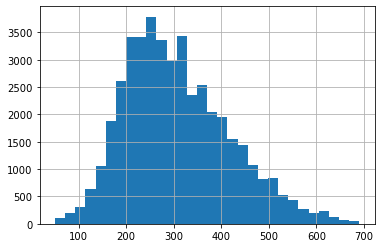

In [70]:
df_nums.ic1.hist(bins = 30)

In [71]:
from sklearn.preprocessing import Normalizer

In [74]:
transformer = Normalizer().fit(df_nums)
x = transformer.transform(df_nums)
df_norm = pd.DataFrame(x,columns = df_nums.columns)

In [75]:
df_norm

,dob,income,hv1,hv2,hv3,hv4,ic1,ic2,ic3,ic4,ic5,numprom,cardprom,cardpm12,numprm12,maxadate,ngiftall,timelag,avggift
0,0.000000,0.000198,0.032840,0.036078,0.000132,0.000066,0.016585,0.019295,0.019295,0.022466,0.764909,0.004163,0.001718,0.000396,0.000925,0.641081,0.001784,0.000793,0.000494
1,0.153235,0.000055,0.054707,0.069095,0.000109,0.000055,0.021117,0.021226,0.021664,0.023141,0.827719,0.003611,0.001477,0.000328,0.000766,0.530769,0.000875,0.000492,0.000373
2,0.382749,0.000255,0.030870,0.033102,0.000191,0.000191,0.016009,0.018114,0.017731,0.019836,0.683539,0.004018,0.001658,0.000255,0.000574,0.618802,0.000893,0.000255,0.000487
3,0.000000,0.000116,0.040598,0.045514,0.000173,0.000173,0.021224,0.026429,0.024926,0.026950,0.823990,0.002024,0.000810,0.000347,0.000694,0.561086,0.000289,0.000347,0.000359
4,0.000000,0.000203,0.015834,0.019489,0.000135,0.000068,0.015293,0.018000,0.018947,0.021857,0.752946,0.004737,0.001962,0.000406,0.000812,0.656519,0.000744,0.000541,0.001224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43751,0.000000,0.000185,0.045420,0.043139,0.000247,0.000247,0.016948,0.018981,0.018057,0.018735,0.798264,0.004622,0.001910,0.000370,0.000924,0.597912,0.000863,0.000616,0.000572
43752,0.295816,0.000109,0.029472,0.038276,0.000164,0.000164,0.015693,0.018591,0.019739,0.022309,0.791977,0.003937,0.001804,0.000328,0.000875,0.530500,0.000930,0.001148,0.000888
43753,0.104470,0.000224,0.034388,0.046398,0.000149,0.000149,0.012756,0.015292,0.015217,0.018089,0.924041,0.001119,0.000410,0.000149,0.000373,0.361859,0.000112,0.000373,0.000361
43754,0.343808,0.000076,0.026018,0.032122,0.000153,0.000076,0.012132,0.014116,0.016328,0.018007,0.575455,0.002899,0.001297,0.000458,0.000916,0.740263,0.000763,0.000229,0.000450


In [76]:
df_norm.describe()

,dob,income,hv1,hv2,hv3,hv4,ic1,ic2,ic3,ic4,ic5,numprom,cardprom,cardpm12,numprm12,maxadate,ngiftall,timelag,avggift
count,43756.000000,43756.000000,43756.000000,43756.000000,43756.000000,43756.000000,43756.000000,43756.000000,43756.000000,43756.000000,43756.000000,43756.000000,43756.000000,43756.000000,43756.000000,43756.000000,43756.000000,43756.000000,43756.000000
mean,0.185358,0.000213,0.042759,0.046325,0.000206,0.000187,0.017390,0.019830,0.020002,0.022276,0.766938,0.002857,0.001157,0.000328,0.000731,0.578993,0.000561,0.000431,0.000668
std,0.119401,0.000102,0.018446,0.019385,0.000073,0.000079,0.004227,0.003833,0.003634,0.003351,0.097810,0.001246,0.000510,0.000077,0.000167,0.109727,0.000400,0.000286,0.000298
min,0.000000,0.000032,0.000000,0.000000,0.000000,0.000000,0.003256,0.003633,0.003785,0.003976,0.187320,0.000474,0.000169,0.000128,0.000263,0.309013,0.000036,0.000000,0.000080
25%,0.097448,0.000132,0.031318,0.033920,0.000150,0.000131,0.014398,0.017286,0.017505,0.020148,0.710133,0.001811,0.000738,0.000271,0.000611,0.500927,0.000244,0.000212,0.000452
50%,0.186575,0.000211,0.038988,0.041985,0.000198,0.000182,0.017145,0.019839,0.019798,0.022290,0.778258,0.002733,0.001091,0.000327,0.000726,0.581781,0.000454,0.000365,0.000619
75%,0.274345,0.000284,0.048205,0.052985,0.000248,0.000234,0.020305,0.022424,0.022428,0.024491,0.838835,0.003751,0.001511,0.000383,0.000846,0.656268,0.000789,0.000599,0.000827
max,0.580185,0.000650,0.160321,0.181990,0.000621,0.000634,0.049126,0.050174,0.052870,0.052795,0.947195,0.008960,0.003160,0.000593,0.001489,0.971251,0.002675,0.001939,0.002291


In [ ]:
#Encode the categorical variables 

In [77]:
df_cats = df.drop(columns=df_norm.columns)
df_cats.head()

,state,pvastate,mdmaud,recp3,gender,domain,homeownr,veterans,rfa_2
0,IL,,XXXX,,F,T2,,,L4E
1,CA,,XXXX,,M,S1,H,,L2G
2,NC,,XXXX,,M,R2,U,,L4E
3,CA,,XXXX,,F,R2,U,,L4E
4,FL,,XXXX,X,F,S2,H,,L2F


In [121]:
one_hot_encoded_training_predictors = pd.get_dummies(train_predictors)

In [98]:
df_cats['state'].value_counts()


CA    16284
FL     7959
TX     7166
IL     6124
MI     5375
NC     3956
WA     3383
GA     3261
IN     2855
WI     2656
MO     2583
TN     2396
AZ     2278
MN     2081
OR     2045
CO     1929
SC     1660
AL     1627
OK     1553
KY     1542
LA     1533
KS     1233
IA     1214
AR      969
MS      948
NV      923
NM      824
NE      715
UT      546
ID      504
MT      498
HI      423
SD      278
AK      275
WY      267
ND      241
AP       78
NY       70
VA       54
OH       52
PA       36
MD       30
MA       25
NJ       24
CT       20
AA       15
AE       14
ME       11
NH        8
VT        6
RI        6
VI        5
GU        3
WV        3
DE        3
DC        1
AS        1
Name: state, dtype: int64

In [99]:
df_cats['gender'].value_counts()

F    48668
M    37132
      2795
U     1635
J      336
C        2
A        1
Name: gender, dtype: int64

In [87]:
df_cats['mdmaud'].value_counts()

XXXX    90290
C1CM       59
L1CM       44
I1CM       34
D2CM       27
C2CM       23
D1CM       19
L2CM       14
L1LM        8
C1LM        8
I2CM        7
D5CM        5
D5MM        5
D2MM        4
C5CM        3
C2MM        3
I1LM        3
D5TM        3
C2LM        2
I5CM        1
C5MM        1
C5TM        1
C1MM        1
I2MM        1
L2TM        1
I5MM        1
L1MM        1
Name: mdmaud, dtype: int64

In [86]:
df_cats['homeownr'].value_counts()

H    49646
     21051
U    19872
Name: homeownr, dtype: int64

In [85]:
df_cats['rfa_2'].value_counts()

L1F    29207
L1G    12007
L2F    10398
L3E     7244
L2E     4681
L1E     4667
L4D     4449
L2G     4410
L4E     3647
L3F     3352
L3D     2267
L4F     1951
L3G     1425
L4G      864
Name: rfa_2, dtype: int64

In [84]:
df_cats['domain'].value_counts()

R2    13006
T2    11717
S1    10866
S2     8054
C2     7834
C1     5793
C3     5056
T1     4712
R3     4572
U1     4259
U2     3111
U3     2484
       2176
T3     2092
S3     1817
U4     1735
R1     1285
Name: domain, dtype: int64

In [135]:
df_cats['recp3'].value_counts()

     88736
X     1833
Name: recp3, dtype: int64

In [136]:
#Dummy encoding method

cats_dummies = pd.get_dummies(df_cats,
               drop_first=True,
               columns=['state','recp3', 'gender','mdmaud', 'homeownr', 'rfa_2','domain'])

In [137]:
cats_dummies.head()

,pvastate,veterans,state_AE,state_AK,state_AL,state_AP,state_AR,state_AS,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_GU,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VI,state_VT,state_WA,state_WI,state_WV,state_WY,recp3_X,gender_A,gender_C,gender_F,gender_J,gender_M,gender_U,mdmaud_C1LM,mdmaud_C1MM,mdmaud_C2CM,mdmaud_C2LM,mdmaud_C2MM,mdmaud_C5CM,mdmaud_C5MM,mdmaud_C5TM,mdmaud_D1CM,mdmaud_D2CM,mdmaud_D2MM,mdmaud_D5CM,mdmaud_D5MM,mdmaud_D5TM,mdmaud_I1CM,mdmaud_I1LM,mdmaud_I2CM,mdmaud_I2MM,mdmaud_I5CM,mdmaud_I5MM,mdmaud_L1CM,mdmaud_L1LM,mdmaud_L1MM,mdmaud_L2CM,mdmaud_L2TM,mdmaud_XXXX,homeownr_H,homeownr_U,rfa_2_L1F,rfa_2_L1G,rfa_2_L2E,rfa_2_L2F,rfa_2_L2G,rfa_2_L3D,rfa_2_L3E,rfa_2_L3F,rfa_2_L3G,rfa_2_L4D,rfa_2_L4E,rfa_2_L4F,rfa_2_L4G,domain_C1,domain_C2,domain_C3,domain_R1,domain_R2,domain_R3,domain_S1,domain_S2,domain_S3,domain_T1,domain_T2,domain_T3,domain_U1,domain_U2,domain_U3,domain_U4
0,,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,,,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,,,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,,,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
